In [1]:
from additional_test_set import AdditionalTestSet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2023-05-20 16:07:41.374708: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Bigger dataset

In [2]:
train_data_path = "data/CTC_new_28_12_2022/countsTrainNew.tsv"
test_data_path = "data/CTC_new_28_12_2022/countsTestNew.tsv"
train_classes_path = "data/CTC_new_28_12_2022/sampleInfoTrain.tsv"
test_classes_path = "data/CTC_new_28_12_2022/sampleInfoTest.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 29154
CTC cells number in train data: 1534
WBC cells number in train data: 27620
CTC-WBC cells number in test data: 0

Total cells number in test data: 357
CTC cells number in test data: 262
WBC cells number in test data: 81
CTC-WBC cells number in test data: 14


In [12]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
biological_features = np.intersect1d(biological_features, data_object.train_data.columns)
biological_features_train_data = data_object.train_data[biological_features]

ctc_train_data = biological_features_train_data[data_object.train_classes == 1]
healthy_train_data = biological_features_train_data[data_object.train_classes == 0]

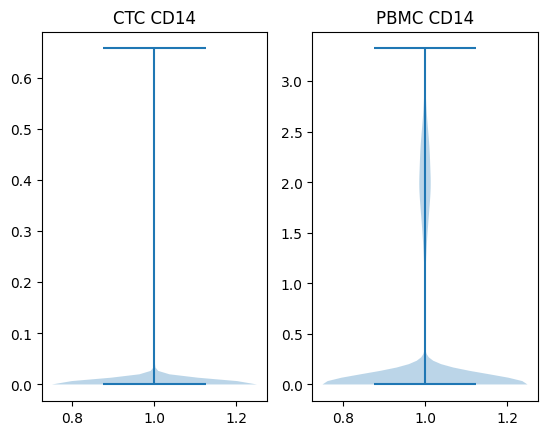

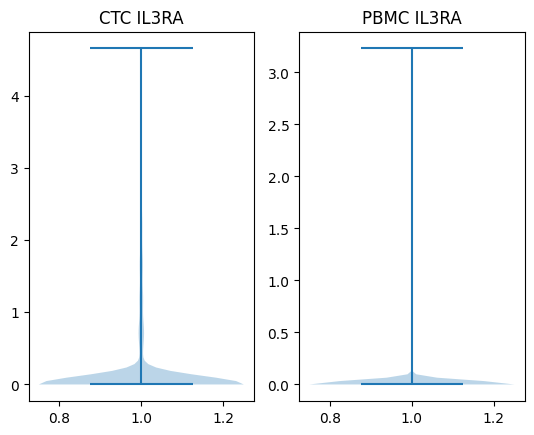

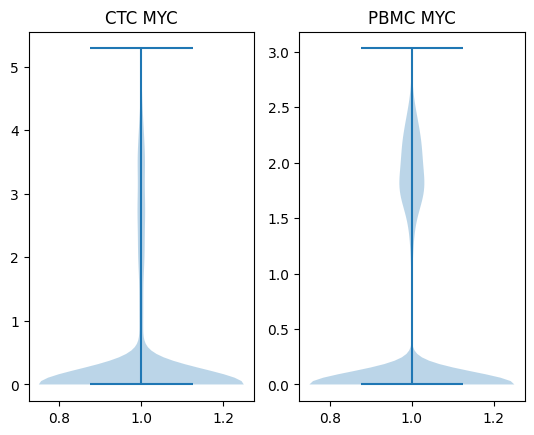

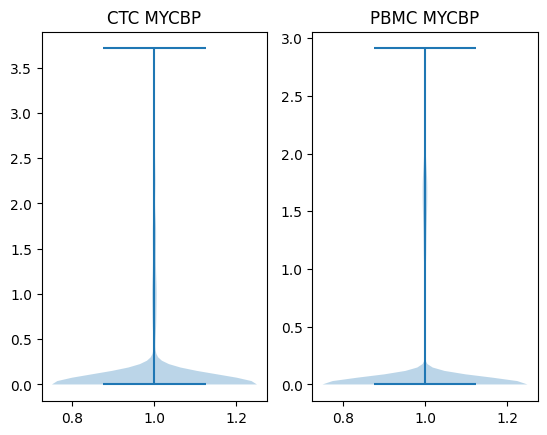

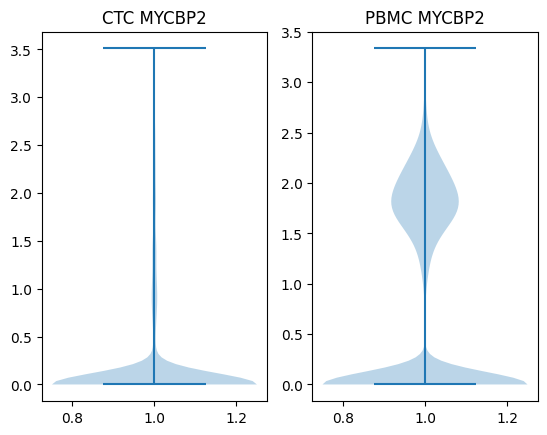

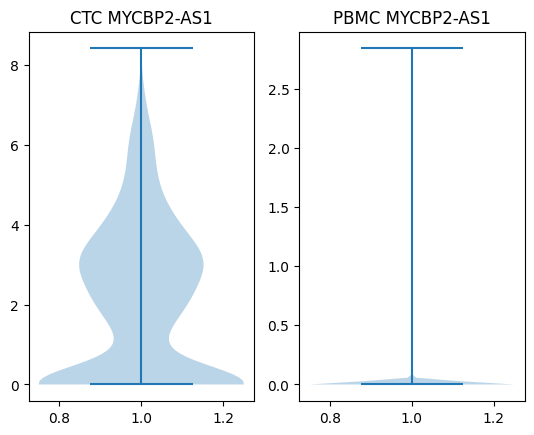

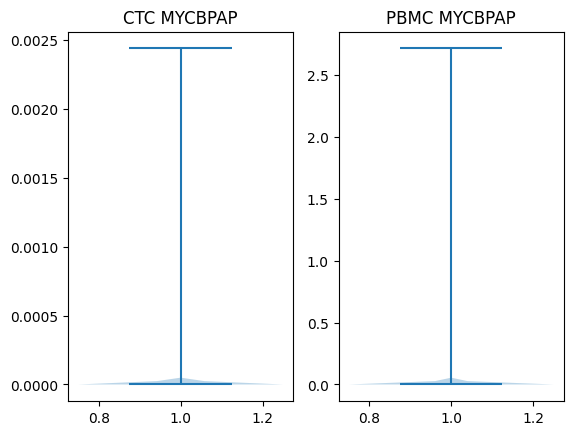

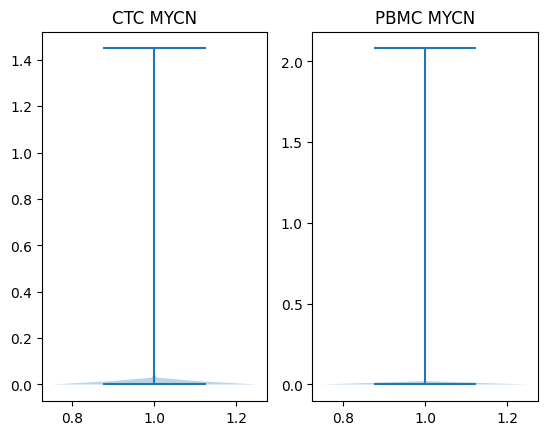

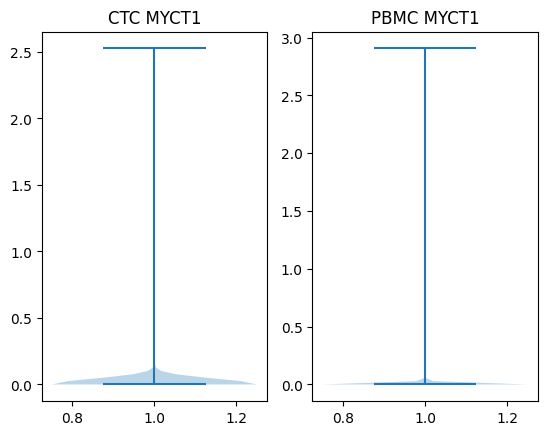

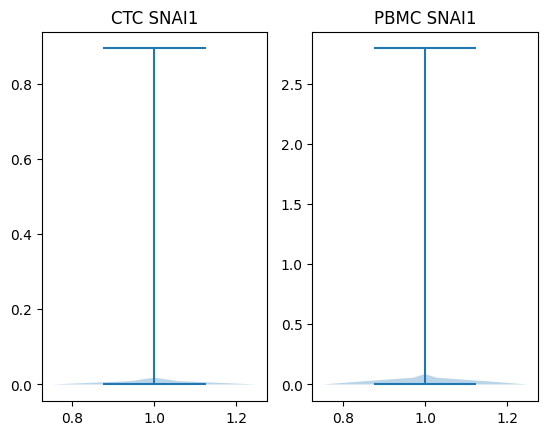

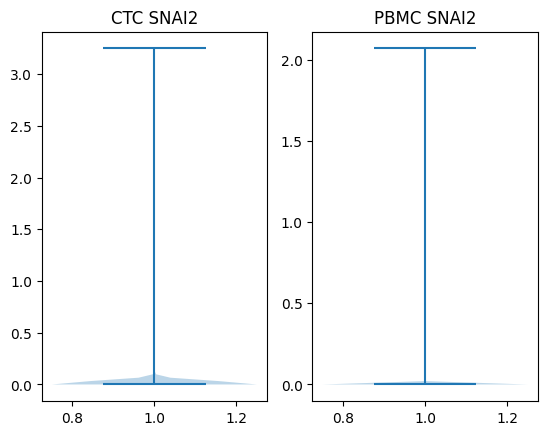

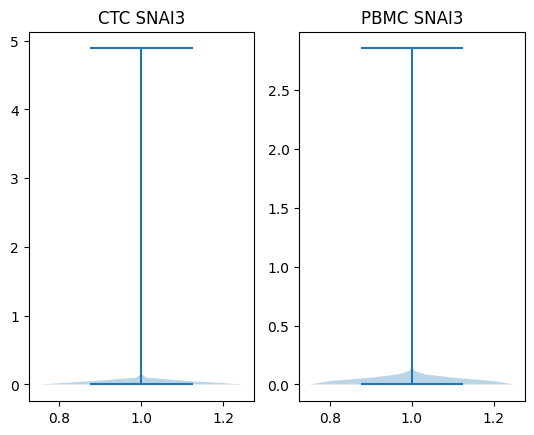

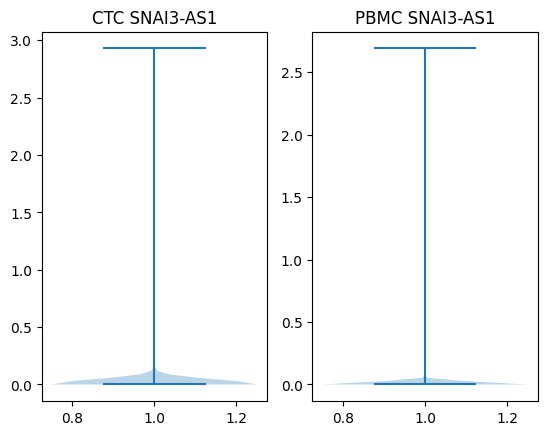

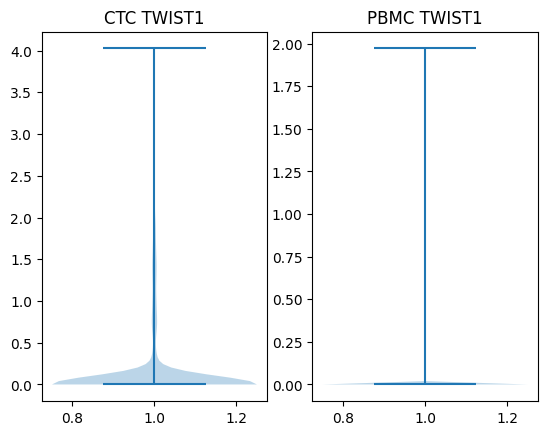

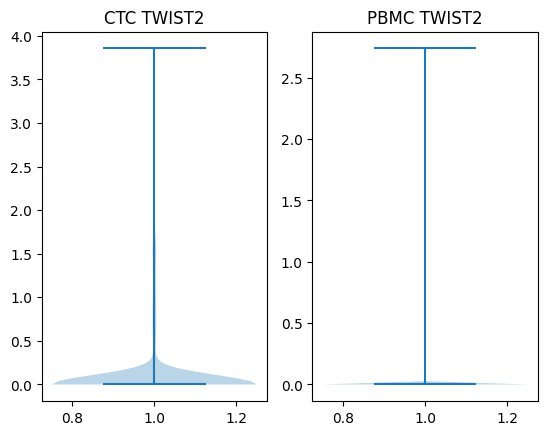

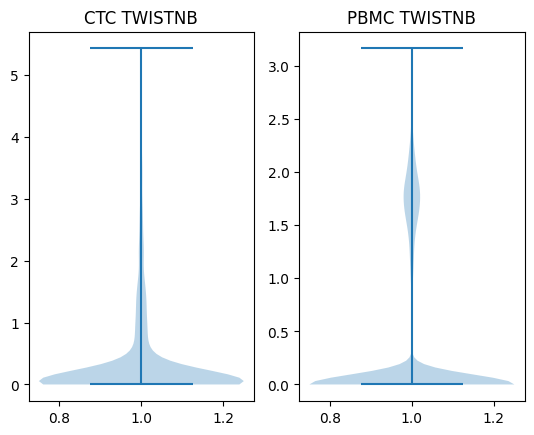

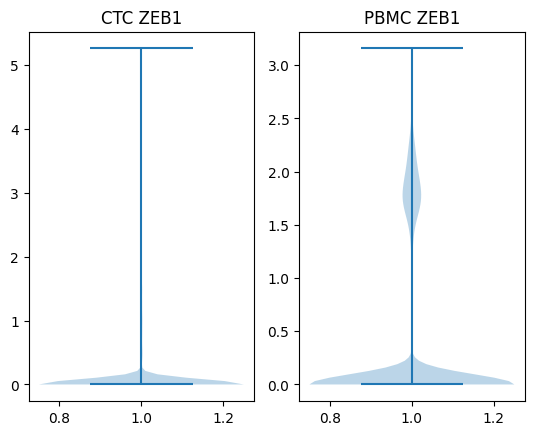

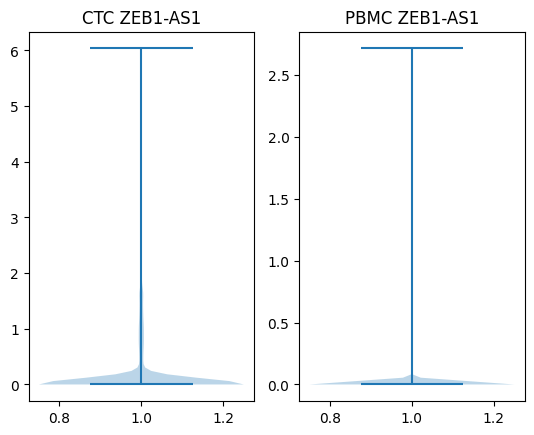

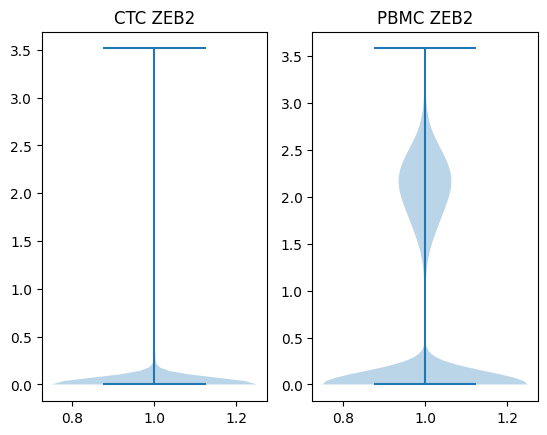

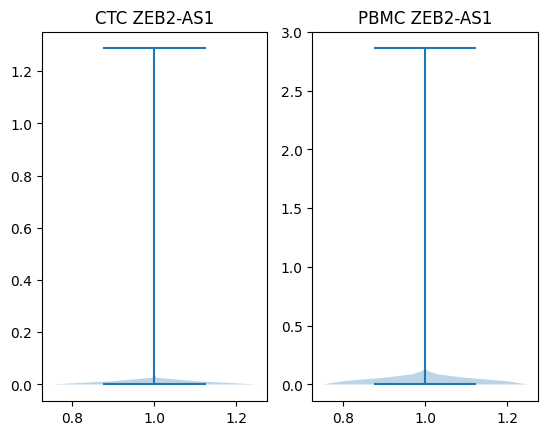

In [13]:
for column_name in biological_features_train_data.columns:
    fig, ax = plt.subplots(1,2)
    ax[0].violinplot(ctc_train_data[column_name])
    ax[0].set_title(f"CTC {column_name}")
    
    ax[1].violinplot(healthy_train_data[column_name])
    ax[1].set_title(f"PBMC {column_name}")
    
    plt.show()

### Smaller dataset

In [14]:
train_data_path = "data/SingleCell_new_split/newSplitTrainCounts.tsv"
test_data_path = "data/SingleCell_new_split/newSplitTestACounts.tsv"
train_classes_path = "data/SingleCell_new_split/newSplitTrainSamples.tsv"
test_classes_path = "data/SingleCell_new_split/newSplitTestASamples.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 176
CTC cells number in train data: 130
WBC cells number in train data: 38
CTC-WBC cells number in test data: 8

Total cells number in test data: 181
CTC cells number in test data: 132
WBC cells number in test data: 43
CTC-WBC cells number in test data: 6


In [15]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
biological_features = np.intersect1d(biological_features, data_object.train_data.columns)
biological_features_train_data = data_object.train_data[biological_features]

ctc_train_data = biological_features_train_data[data_object.train_classes == 1]
healthy_train_data = biological_features_train_data[data_object.train_classes == 0]

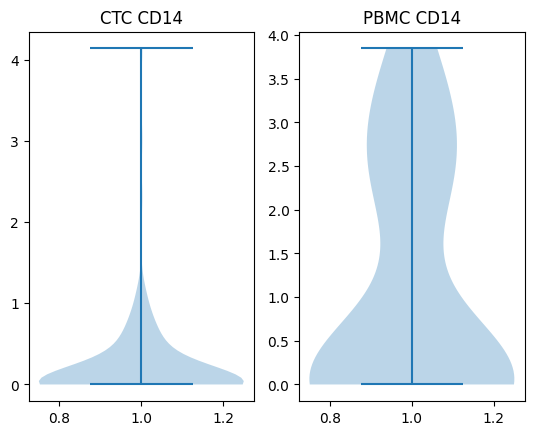

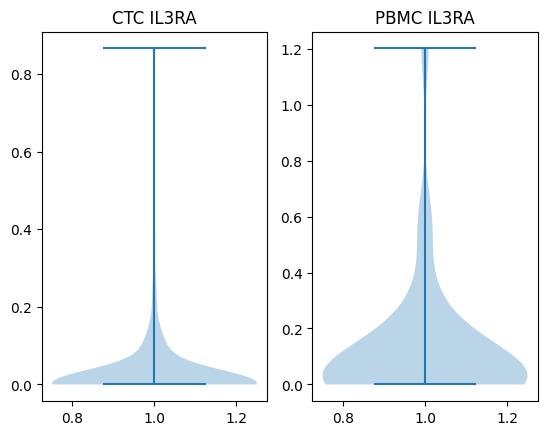

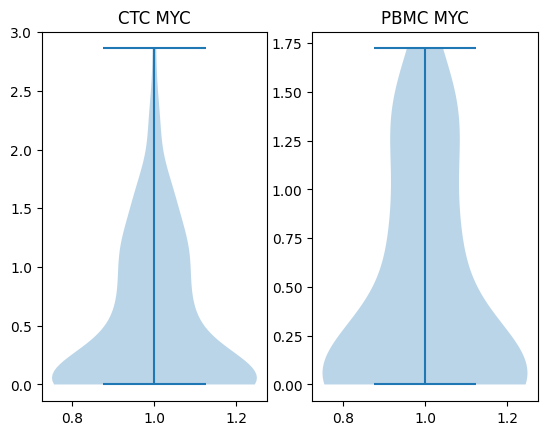

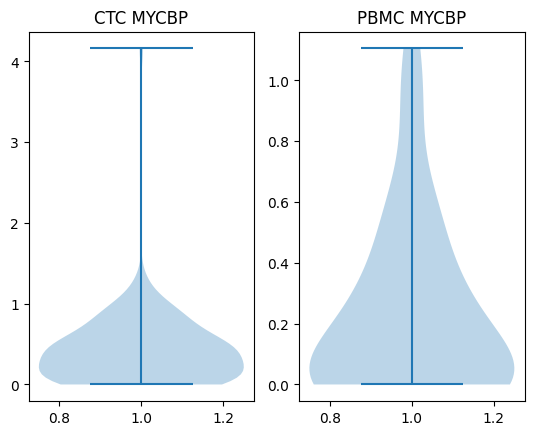

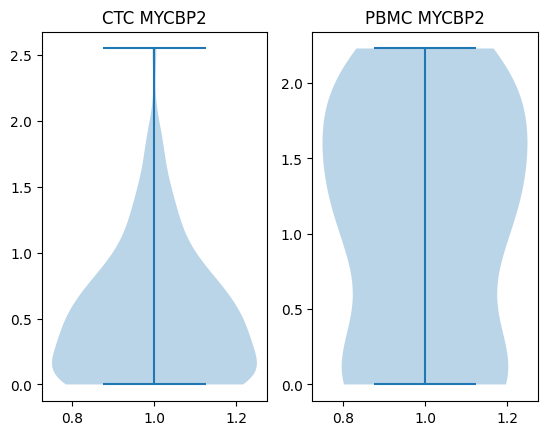

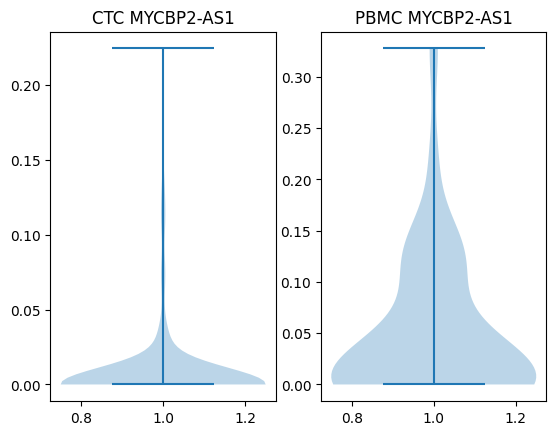

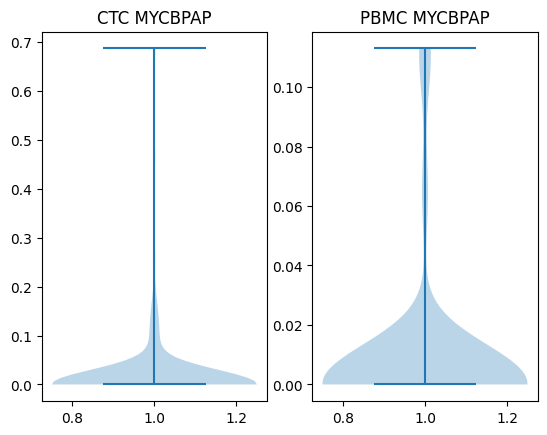

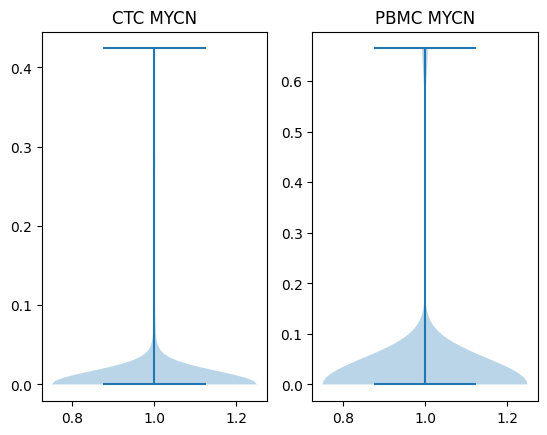

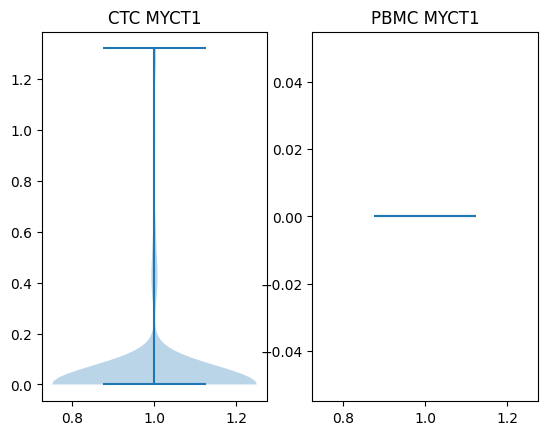

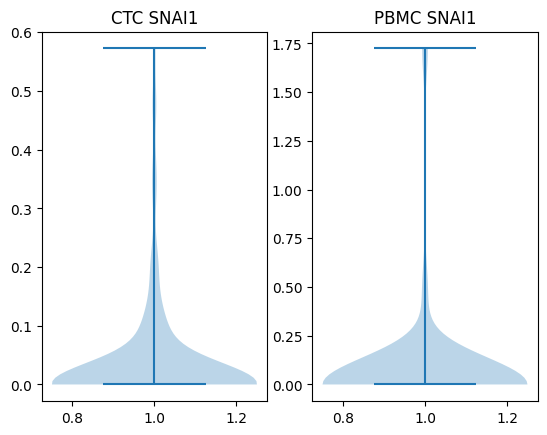

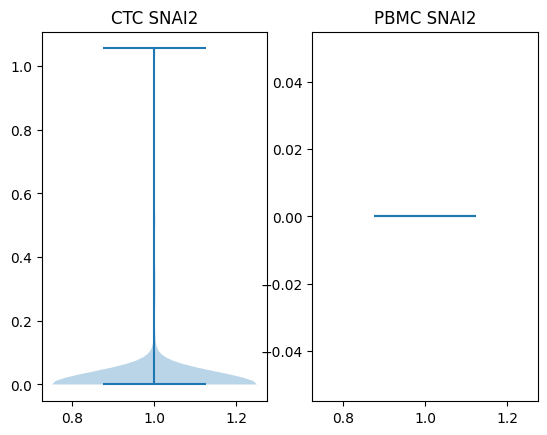

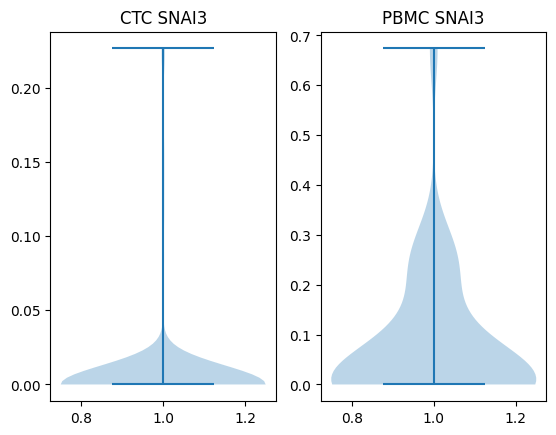

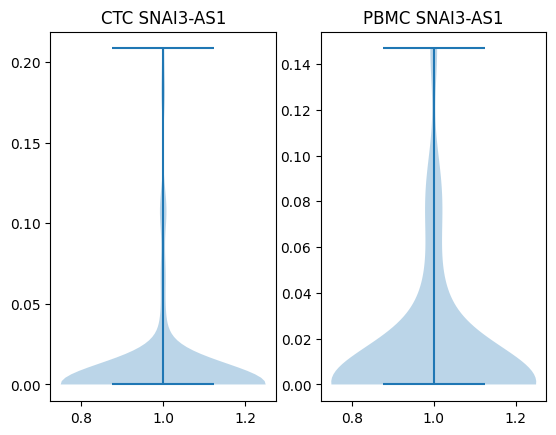

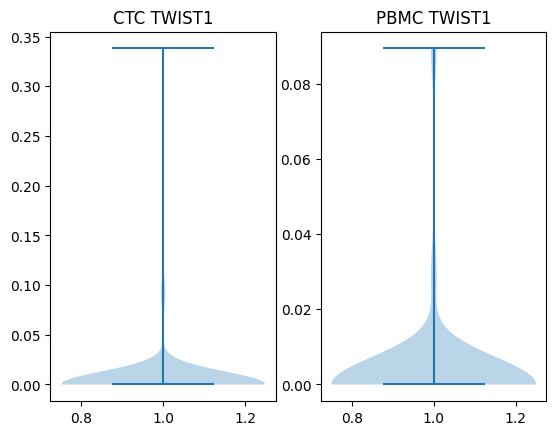

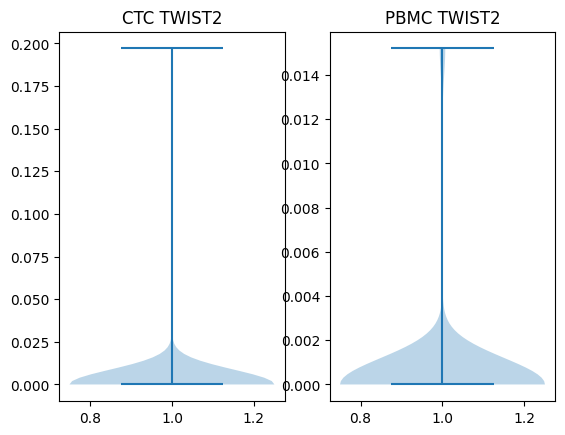

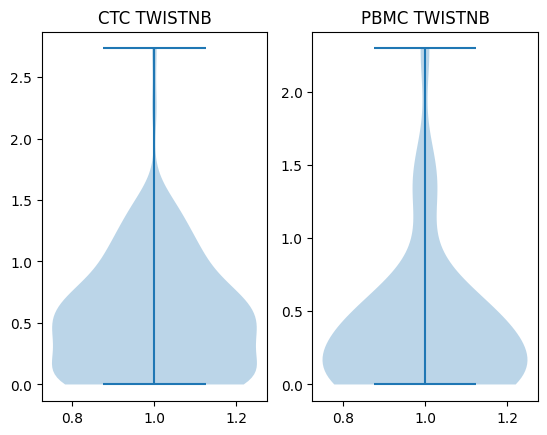

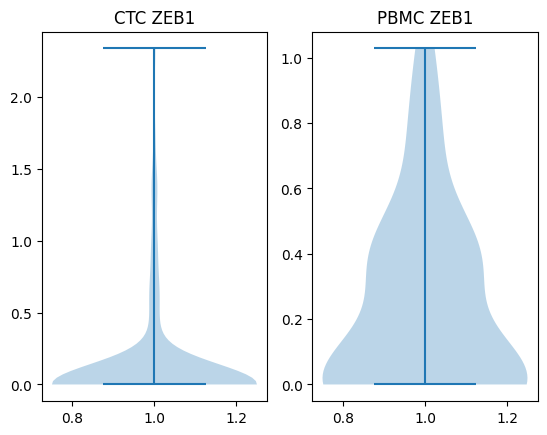

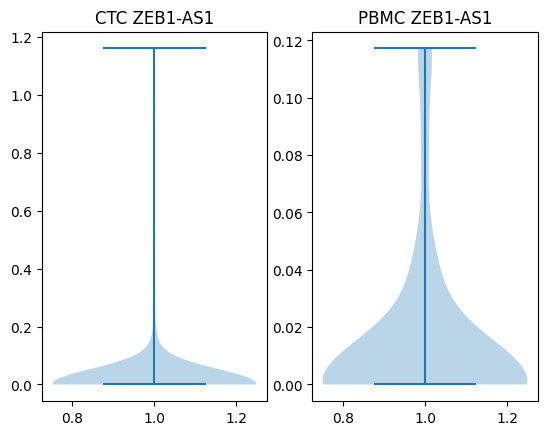

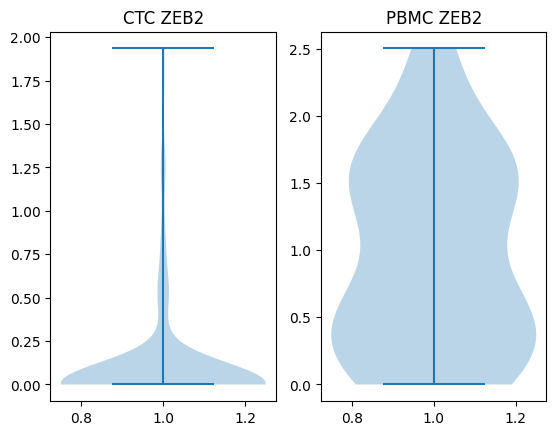

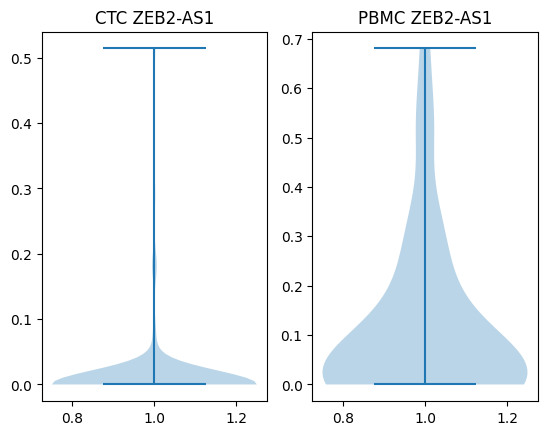

In [16]:
for column_name in biological_features_train_data.columns:
    fig, ax = plt.subplots(1,2)
    ax[0].violinplot(ctc_train_data[column_name])
    ax[0].set_title(f"CTC {column_name}")
    
    ax[1].violinplot(healthy_train_data[column_name])
    ax[1].set_title(f"PBMC {column_name}")
    
    plt.show()